In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [4]:
gdown.download('https://drive.google.com/file/d/1PY66TvLtUJp0NyIhpnYY7l7tE9s2g5ZV/view?usp=sharing',fuzzy=True)



100%|██████████| 1.15G/1.15G [00:19<00:00, 57.7MB/s]


'datav10.npz'

In [5]:
gdown.download('https://drive.google.com/file/d/1o_Bbgs2k7zNGtOX7KyFm5R8ySsPkC8Tq/view?usp=sharing',fuzzy=True )


Downloading...
From: https://drive.google.com/uc?id=1o_Bbgs2k7zNGtOX7KyFm5R8ySsPkC8Tq
To: /content/datav10.json
100%|██████████| 789k/789k [00:00<00:00, 39.5MB/s]


'datav10.json'

In [7]:
loaded_data  = np.load('datav10.npz') #load the array saved in the data processing step

In [8]:
loaded_data

NpzFile 'datav10.npz' with keys: gtexdata

In [9]:
A = loaded_data['gtexdata'] #get the exact variable

In [10]:
A.shape #27 Tissues, 943 Donors, 19121 Genes

(27, 945, 18969)

In [11]:
with open('datav10.json', 'r') as f:
    [tissue_index, donor_index, gene_index, tissue_donor] = json.load(f) #loading other arrays saved in the data processing step

In [12]:
tissue_index

{'adipose_subcutaneous': 0,
 'adrenal_gland': 1,
 'artery_tibial': 2,
 'brain_cerebellum': 3,
 'breast_mammary_tissue': 4,
 'colon_transverse': 5,
 'esophagus_mucosa': 6,
 'heart_left_ventricle': 7,
 'kidney_cortex': 8,
 'liver': 9,
 'lung': 10,
 'minor_salivary_gland': 11,
 'muscle_skeletal': 12,
 'nerve_tibial': 13,
 'ovary': 14,
 'pancreas': 15,
 'pituitary': 16,
 'prostate': 17,
 'skin_sun_exposed_lower_leg': 18,
 'small_intestine_terminal_ileum': 19,
 'spleen': 20,
 'stomach': 21,
 'testis': 22,
 'thyroid': 23,
 'uterus': 24,
 'vagina': 25,
 'whole_blood': 26}

In [13]:
len(tissue_index) #length of tissues

27

In [14]:
len(donor_index) #length of donors

945

In [15]:
len(gene_index) #length of genes

18969

In [16]:
len(tissue_donor) #Donors relating to each tissue

27

In [17]:
tissue_index


{'adipose_subcutaneous': 0,
 'adrenal_gland': 1,
 'artery_tibial': 2,
 'brain_cerebellum': 3,
 'breast_mammary_tissue': 4,
 'colon_transverse': 5,
 'esophagus_mucosa': 6,
 'heart_left_ventricle': 7,
 'kidney_cortex': 8,
 'liver': 9,
 'lung': 10,
 'minor_salivary_gland': 11,
 'muscle_skeletal': 12,
 'nerve_tibial': 13,
 'ovary': 14,
 'pancreas': 15,
 'pituitary': 16,
 'prostate': 17,
 'skin_sun_exposed_lower_leg': 18,
 'small_intestine_terminal_ileum': 19,
 'spleen': 20,
 'stomach': 21,
 'testis': 22,
 'thyroid': 23,
 'uterus': 24,
 'vagina': 25,
 'whole_blood': 26}

### Gene Expression Variability Analysis :
##### Identify candidate genes g1 and g2:
* g1: Expression is highly variable across samples within a tissue but shows poor co-expression between any two tissues.
* g2: High co-expression between most tissue pairs, indicating possible polymorphic influence.


In [81]:
g1_candidates = [] #initialise array for g1
g2_candidates = []#initialise array for g2
i=0
j=0
for gene in gene_index.values(): #loop through all genes
    gene_expression = A[:, :, gene] #Get the genes which are mean TMP>10,and creates a 2D array
    tissue_variance = np.var(gene_expression, axis=1) #calculate the variance across donors
    co_expression_matrix = np.corrcoef(gene_expression)# calculate the pearson Correlation Coefficient
    np.fill_diagonal(co_expression_matrix, np.nan) #fill diagonal value with nan
    # g1: High variability within tissue and poor co-expression between tissues
    #if np.any(tissue_variance > np.mean(tissue_variance) + np.std(tissue_variance)):

    if np.any((np.std(tissue_variance) / np.mean(tissue_variance)) > 5.0):#Coefficient of Variation (CV) is a statistical measure of the relative dispersion of data points in a data series around the mean.
      i=i+1
      if np.all(np.nan_to_num(co_expression_matrix) < 0.15):  # Poor co-expression threshold
            j=j+1
            g1_candidates.append(gene)
    # g2: High co-expression between most tissue pairs
    if np.nanmean(co_expression_matrix) > 0.30:
        g2_candidates.append(gene)



In [82]:
i


2013

In [83]:
j


25

In [84]:
len(g1_candidates) #number of g1 candidate genes


25

In [85]:
len(g2_candidates) #number of g2 candidate genes

13

In [86]:
g1_candidates

[386,
 571,
 3079,
 5153,
 5198,
 7768,
 8162,
 8216,
 10164,
 10422,
 12150,
 12617,
 13778,
 14698,
 15341,
 15703,
 15758,
 15791,
 15817,
 15902,
 16564,
 17504,
 17938,
 18507,
 18710]

In [87]:
g2_candidates

[7720,
 14453,
 15122,
 15500,
 15534,
 15611,
 15819,
 15866,
 15874,
 16089,
 16337,
 17575,
 17818]

### Verification g1

In [88]:
print(list(gene_index.keys())[386])

ENSG00000021852.13#C8B


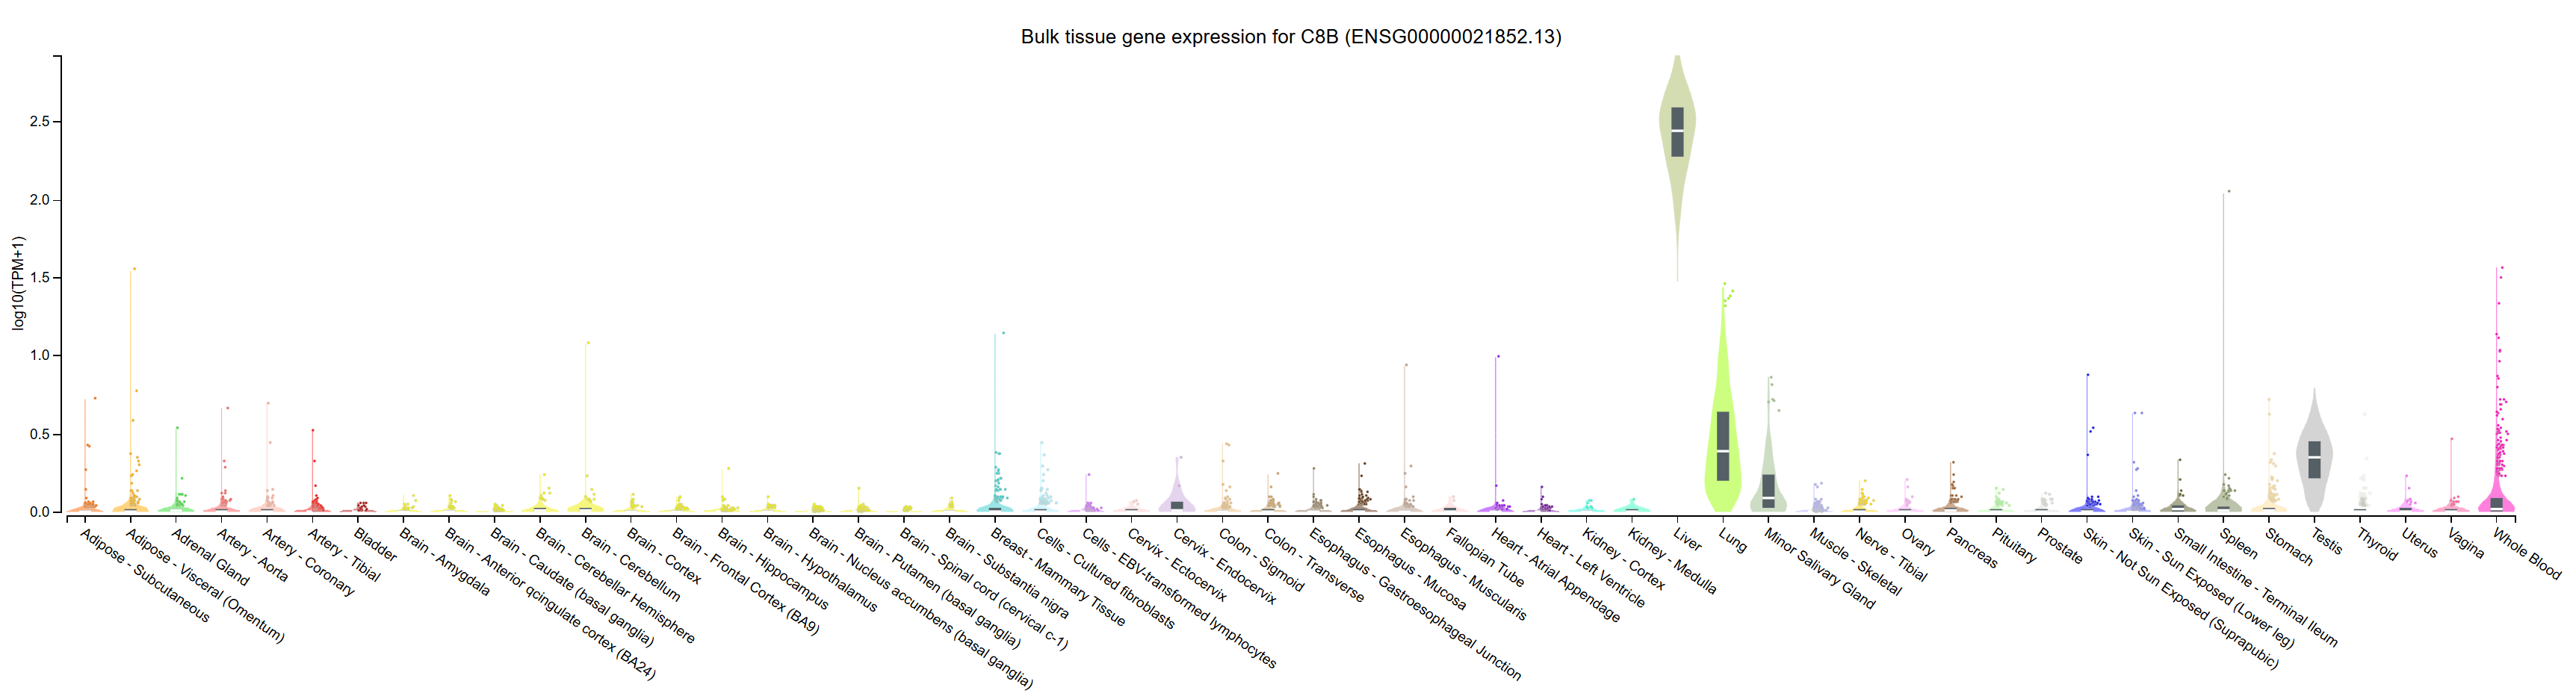

In [90]:
gene_expression = A[:, :, 386]

In [91]:
tissue_variance = np.var(gene_expression, axis=1)

In [92]:
tissue_variance.shape

(27,)

In [93]:
tissue_variance

array([2.64693437e-02, 7.50304512e-03, 8.04800167e-03, 1.29682425e-01,
       1.89962742e-01, 1.53874380e-03, 3.98485917e-03, 4.59259820e-04,
       1.42871645e-04, 2.57281078e+04, 9.90567922e+00, 2.11603554e-01,
       1.27453935e-03, 2.10735914e-03, 9.99495419e-04, 4.27910917e-03,
       1.05742048e-03, 7.77666732e-04, 2.63122540e-02, 3.10129622e-03,
       1.32789531e+01, 4.01592880e-02, 7.91681243e-01, 1.53572969e-02,
       1.09527582e-03, 4.24617547e-03, 3.65239316e+00])

In [94]:
co_expression_matrix = np.corrcoef(gene_expression)

In [95]:
co_expression_matrix.shape

(27, 27)

In [96]:
np.fill_diagonal(co_expression_matrix, np.nan)

In [99]:
np.any((np.std(tissue_variance) / np.mean(tissue_variance)) > 5.0)

True

In [101]:
tissue_variance[(np.std(tissue_variance) / np.mean(tissue_variance)) > 5.0]

array([[2.64693437e-02, 7.50304512e-03, 8.04800167e-03, 1.29682425e-01,
        1.89962742e-01, 1.53874380e-03, 3.98485917e-03, 4.59259820e-04,
        1.42871645e-04, 2.57281078e+04, 9.90567922e+00, 2.11603554e-01,
        1.27453935e-03, 2.10735914e-03, 9.99495419e-04, 4.27910917e-03,
        1.05742048e-03, 7.77666732e-04, 2.63122540e-02, 3.10129622e-03,
        1.32789531e+01, 4.01592880e-02, 7.91681243e-01, 1.53572969e-02,
        1.09527582e-03, 4.24617547e-03, 3.65239316e+00]])

In [102]:
np.all(np.nan_to_num(co_expression_matrix) < 0.15)

True

In [103]:
np.nanmean(co_expression_matrix) > 0.30

False

In [104]:
print(list(gene_index.keys())[7720])

ENSG00000144820.8#ADGRG7


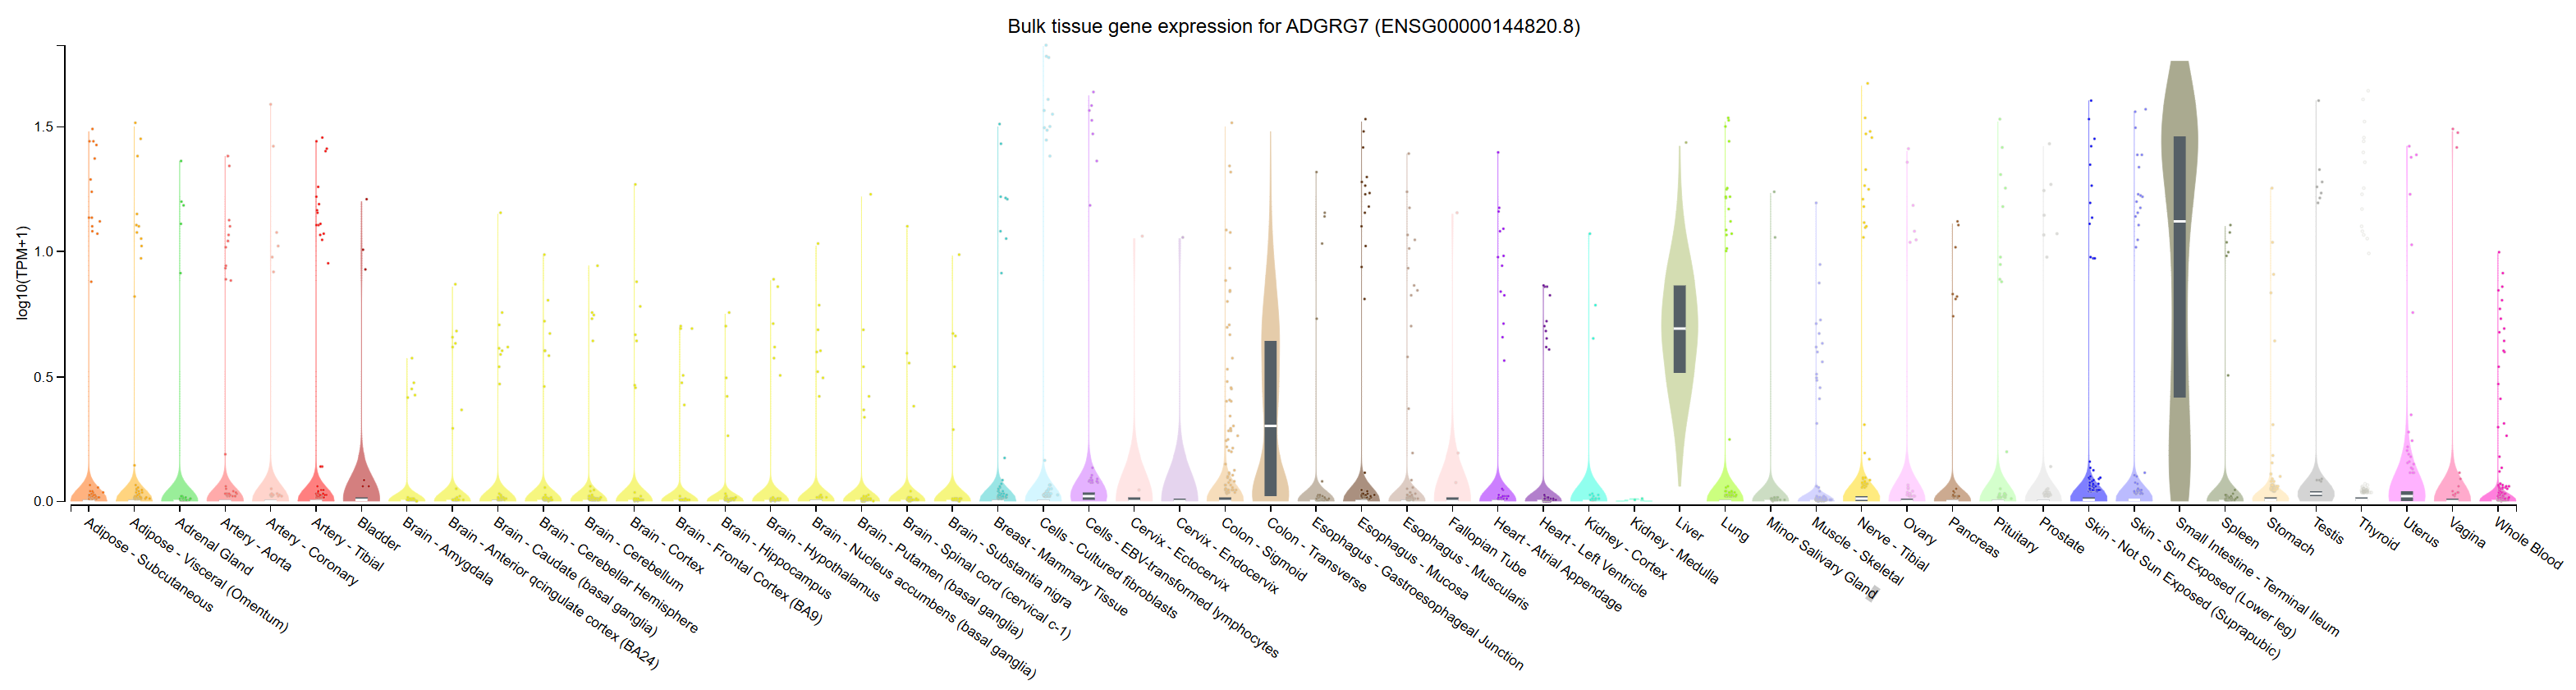

In [106]:
gene_expression = A[:, :, 7720]

In [107]:
tissue_variance = np.var(gene_expression, axis=1)

In [108]:
tissue_variance


array([ 5.16691987,  1.15221305,  4.74109949,  0.14049341,  2.75909883,
        6.34565596,  4.90466926,  0.23877325,  0.16331406,  8.07817504,
        6.14215426,  0.39093768,  0.4402458 ,  7.87186773,  1.69143567,
        0.51106093,  2.90165784,  1.80795027,  7.03466558, 93.19595014,
        0.53619458,  0.50600378,  3.41758747,  8.51203308,  2.1704365 ,
        2.48068998,  0.3652185 ])

In [109]:
co_expression_matrix = np.corrcoef(gene_expression)

In [110]:
np.any((np.std(tissue_variance) / np.mean(tissue_variance)) > 5.0)

False

In [111]:
tissue_variance[(np.std(tissue_variance) / np.mean(tissue_variance)) > 5.0]

array([], shape=(0, 27), dtype=float64)

In [112]:
np.all(np.nan_to_num(co_expression_matrix) < 0.15)

False

In [113]:
np.nanmean(co_expression_matrix) > 0.25

True

### g1 candidate gene (Based on the threshold 0.15)

In [114]:
[key for key, value in gene_index.items() if value in g1_candidates]

['ENSG00000021852.13#C8B',
 'ENSG00000046774.10#MAGEC2',
 'ENSG00000106648.14#GALNTL5',
 'ENSG00000125815.9#CST8',
 'ENSG00000125975.14#C20orf173',
 'ENSG00000145309.6#CABS1',
 'ENSG00000149021.7#SCGB1A1',
 'ENSG00000149507.7#OOSP2',
 'ENSG00000165059.8#PRKACG',
 'ENSG00000166329.3#CCDC182',
 'ENSG00000176566.5#DCAF4L2',
 'ENSG00000180483.7#DEFB119',
 'ENSG00000188755.10#TBC1D3P2',
 'ENSG00000204300.7#TMEM225',
 'ENSG00000215486.5#ARL2BPP3',
 'ENSG00000227255.1#CDRT15P2',
 'ENSG00000228309.7#LINC01350',
 'ENSG00000228740.3#GABRG3-AS1',
 'ENSG00000229315.7#MCHR2-AS1',
 'ENSG00000230651.8#RGPD4-AS1',
 'ENSG00000243062.6#ENSG00000243062',
 'ENSG00000261470.1#ENSG00000261470',
 'ENSG00000271776.1#ENSG00000271776',
 'ENSG00000280440.1#ENSG00000280440',
 'ENSG00000286684.1#ENSG00000286684']

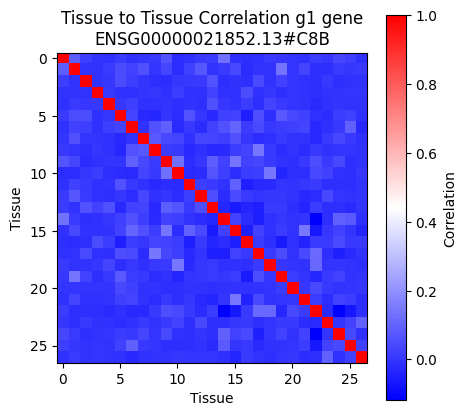

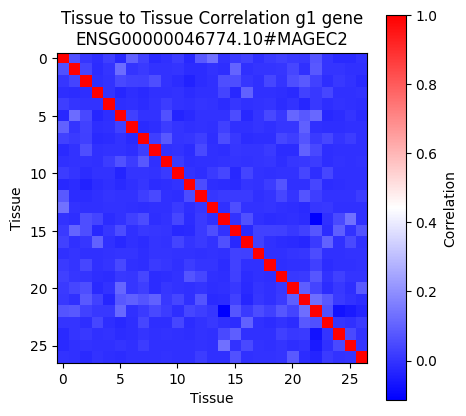

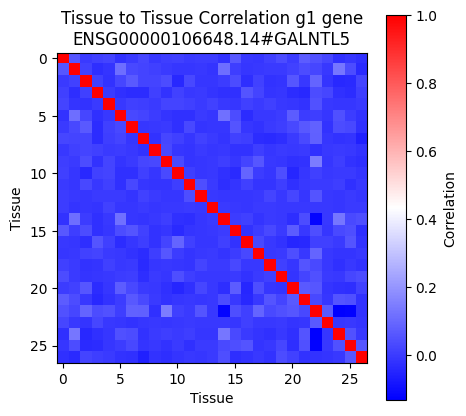

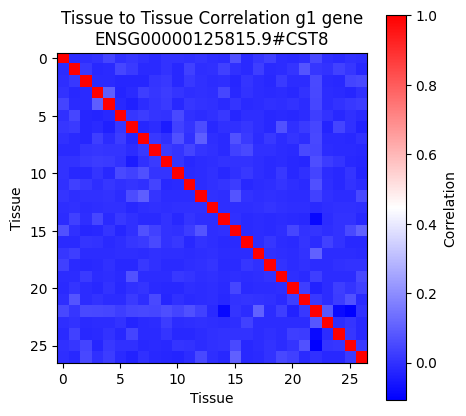

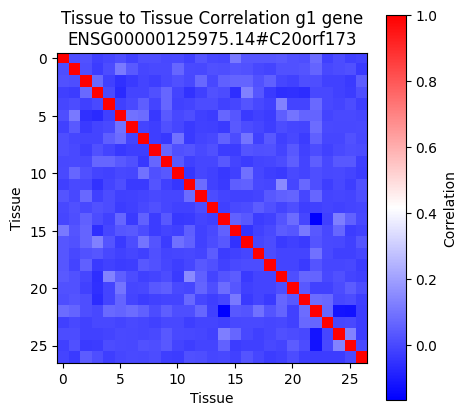

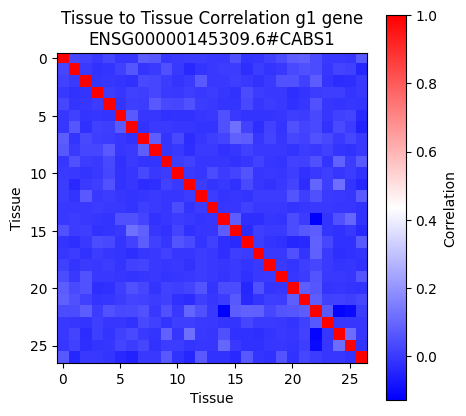

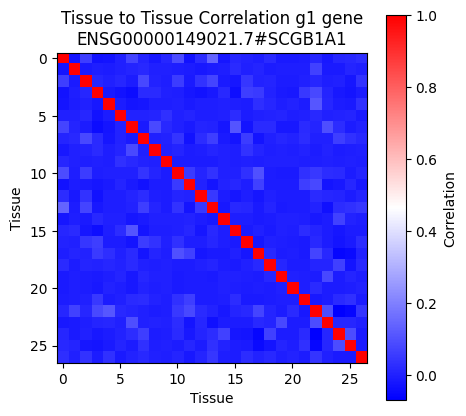

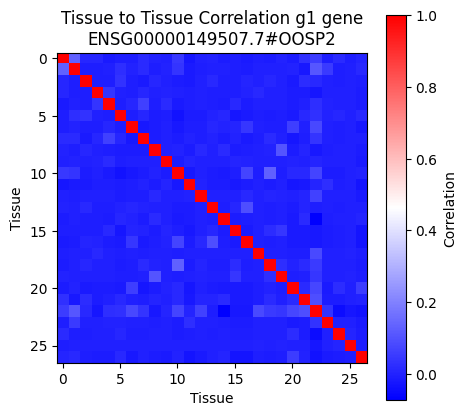

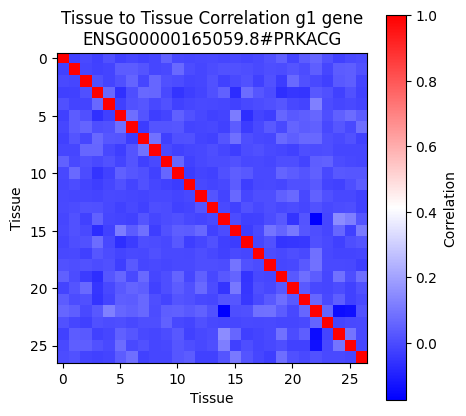

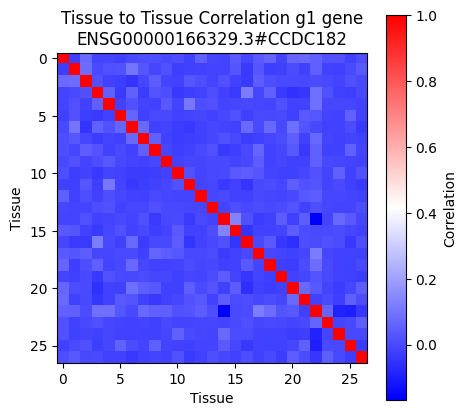

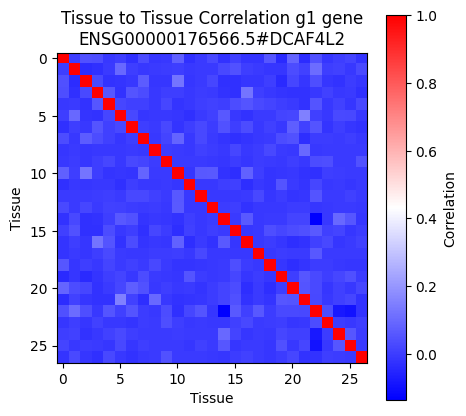

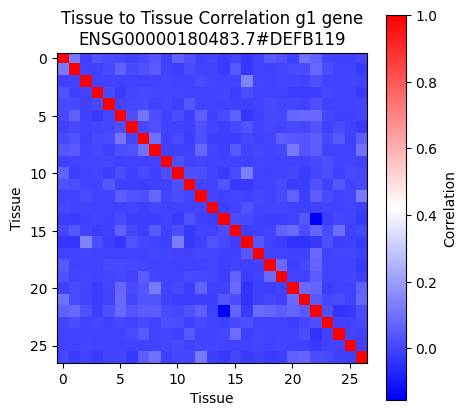

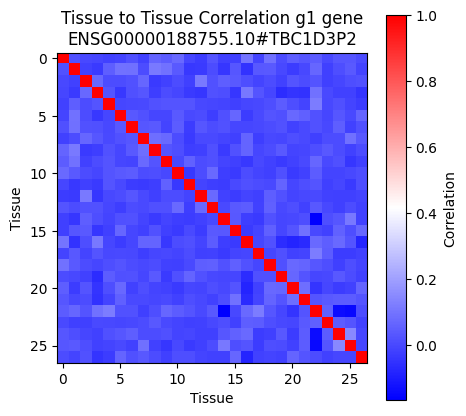

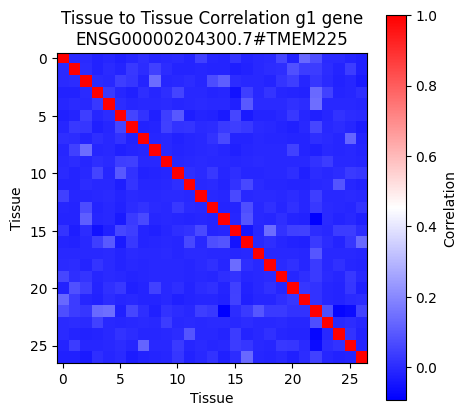

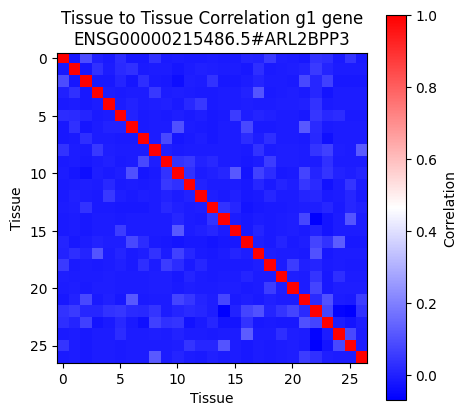

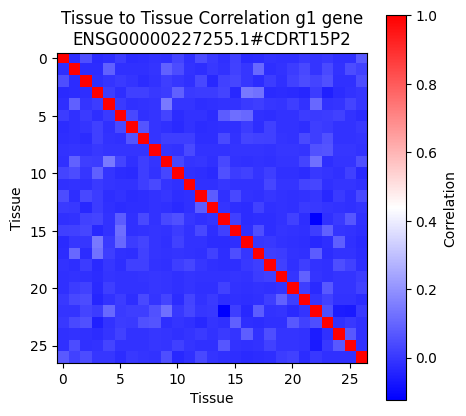

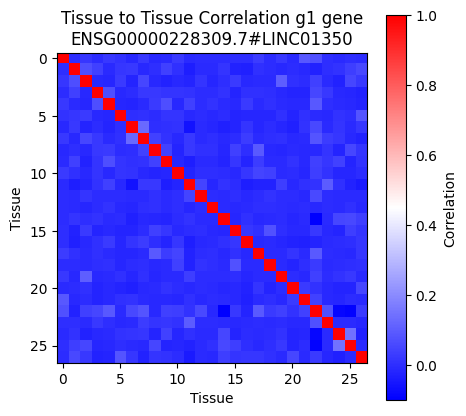

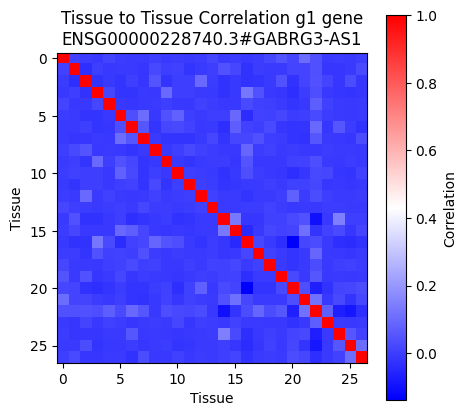

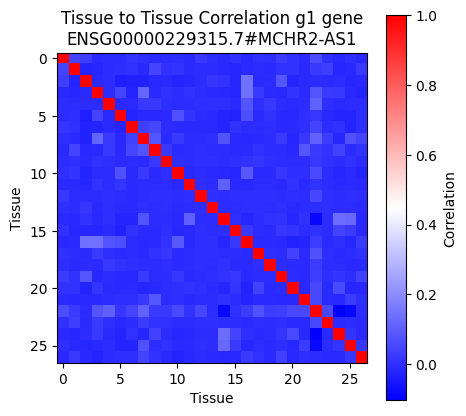

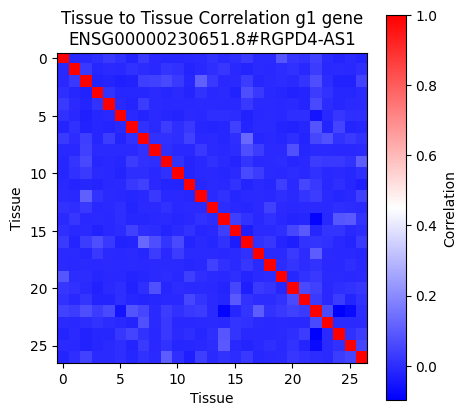

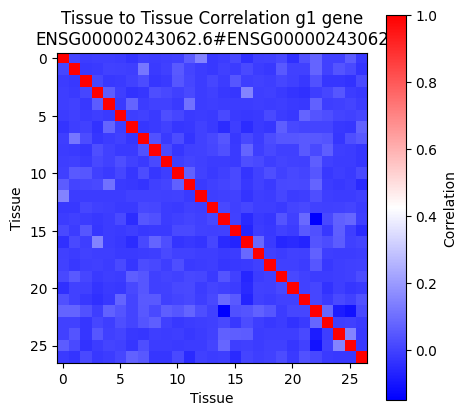

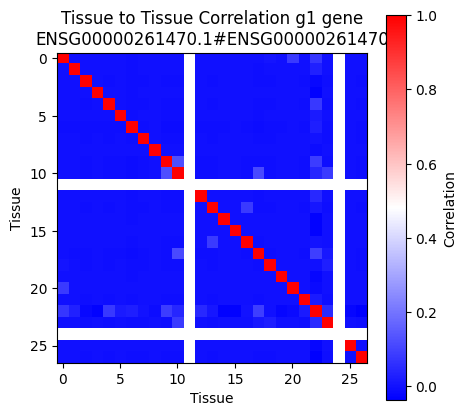

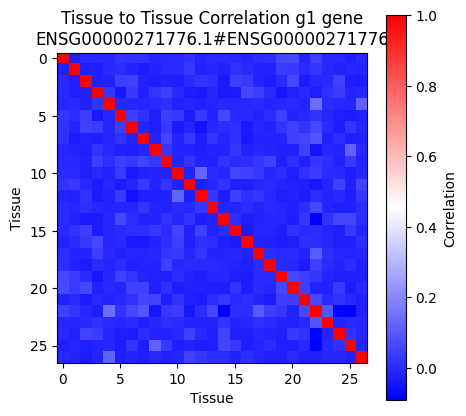

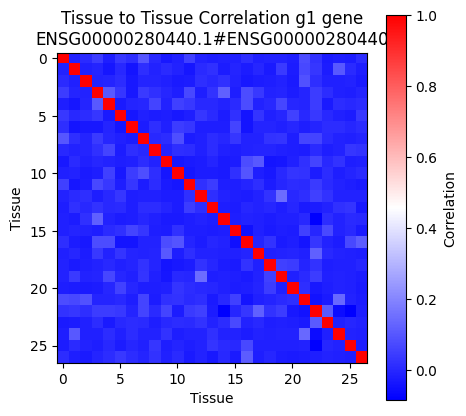

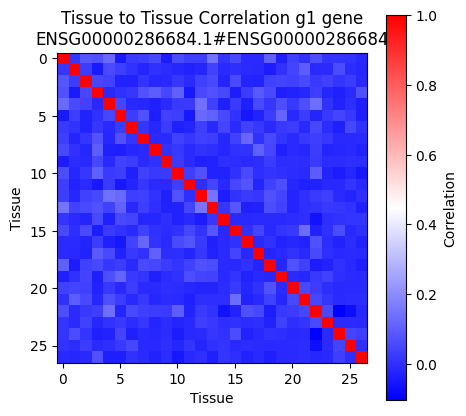

In [115]:
for g in g1_candidates:
  gene_expression = A[:, :, g]
  co_expression_matrix = np.corrcoef(gene_expression)
  plt.figure(figsize=(5, 5))
  plt.imshow(co_expression_matrix, cmap='bwr')
  plt.colorbar(label='Correlation')
  plt.title("Tissue to Tissue Correlation g1 gene\n" + list(gene_index.keys())[g])
  plt.xlabel('Tissue')
  plt.ylabel('Tissue')
  plt.show()

### g2 candidate gene (Based on the threshold mean 0.25)

In [116]:
[key for key, value in gene_index.items() if value in g2_candidates]

['ENSG00000144820.8#ADGRG7',
 'ENSG00000198744.5#MTCO3P12',
 'ENSG00000213058.3#ENSG00000213058',
 'ENSG00000224114.1#ENSG00000224114',
 'ENSG00000224858.5#RPL29P11',
 'ENSG00000225972.1#MTND1P23',
 'ENSG00000229344.1#MTCO2P12',
 'ENSG00000230076.1#RPL10P6',
 'ENSG00000230202.1#ENSG00000230202',
 'ENSG00000233913.7#RPL10P9',
 'ENSG00000237973.1#MTCO1P12',
 'ENSG00000262902.1#MTCO1P40',
 'ENSG00000269028.3#MTRNR2L12']

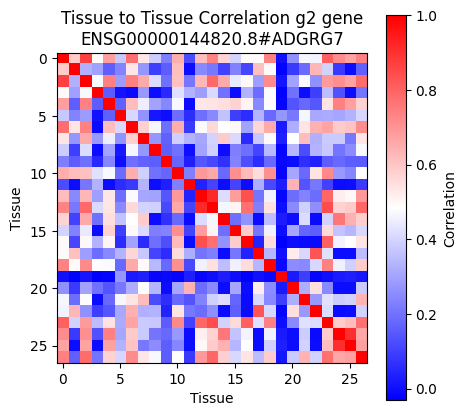

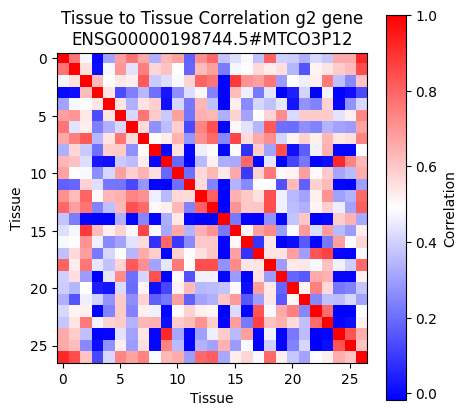

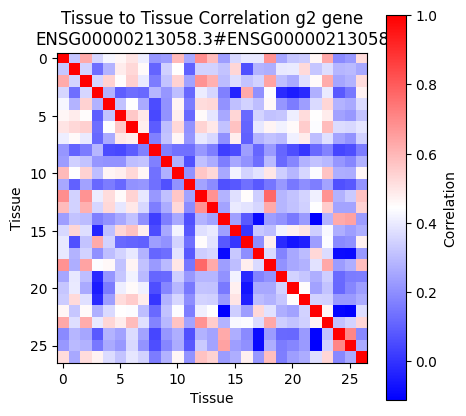

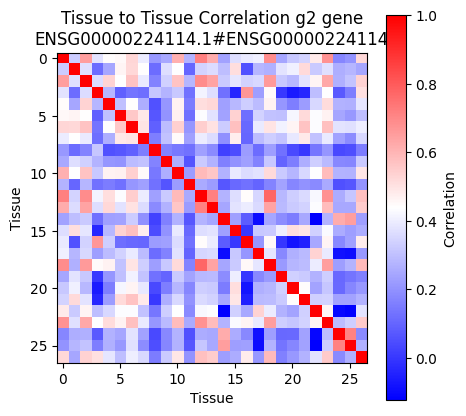

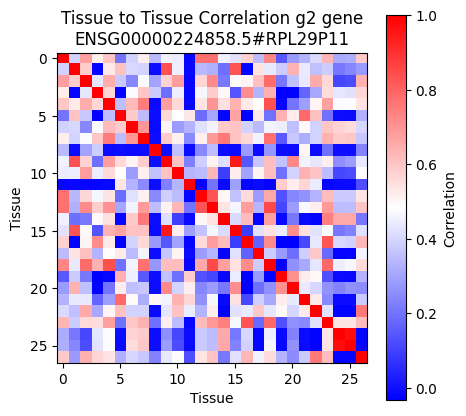

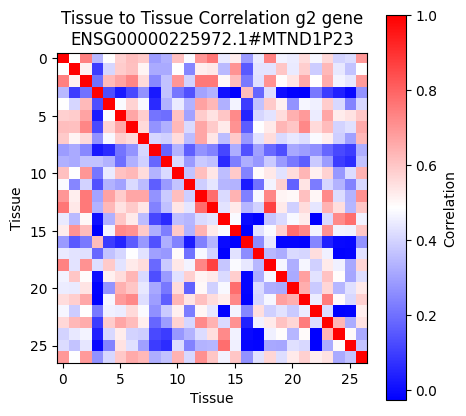

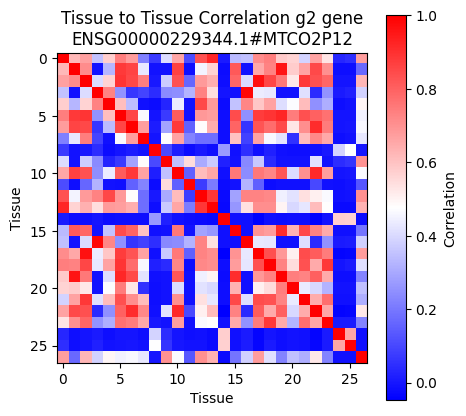

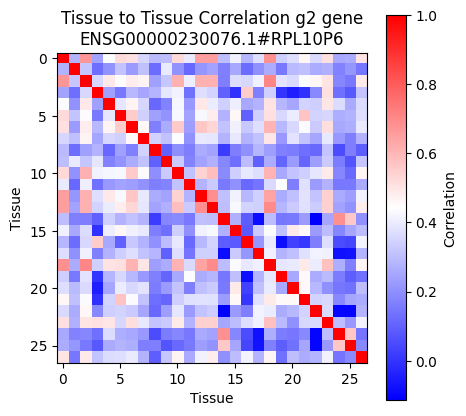

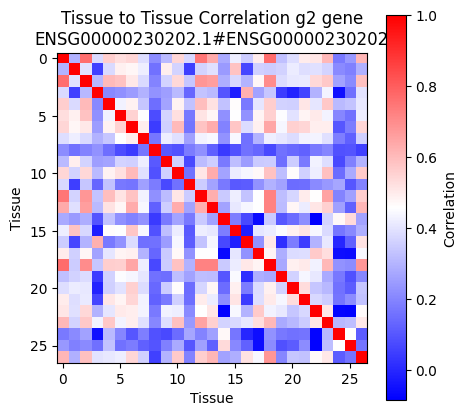

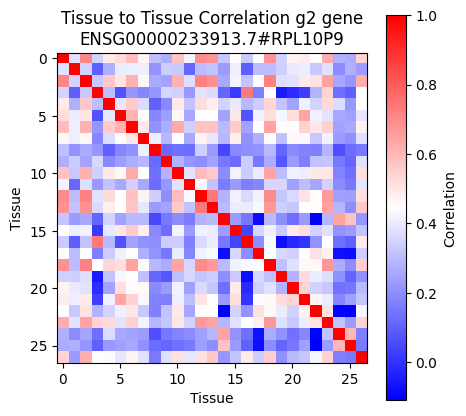

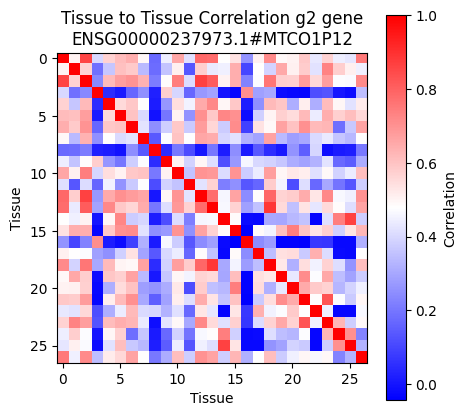

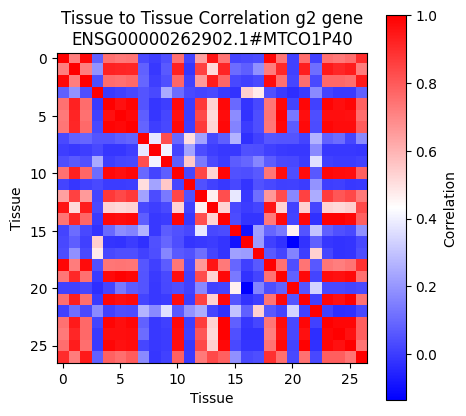

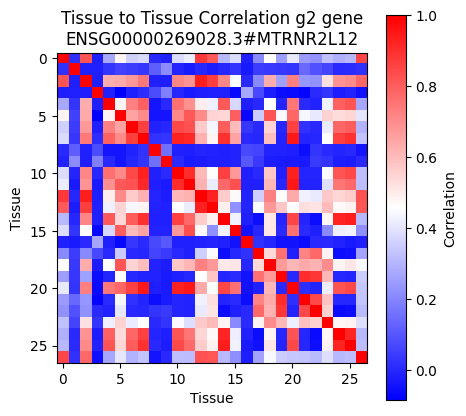

In [117]:
for g in g2_candidates:
    gene_expression = A[:, :, g]
    co_expression_matrix = np.corrcoef(gene_expression)
    plt.figure(figsize=(5, 5))
    plt.imshow(co_expression_matrix, cmap='bwr')
    plt.colorbar(label='Correlation')
    plt.title("Tissue to Tissue Correlation g2 gene\n" + list(gene_index.keys())[g])
    plt.xlabel('Tissue')
    plt.ylabel('Tissue')
    plt.show()

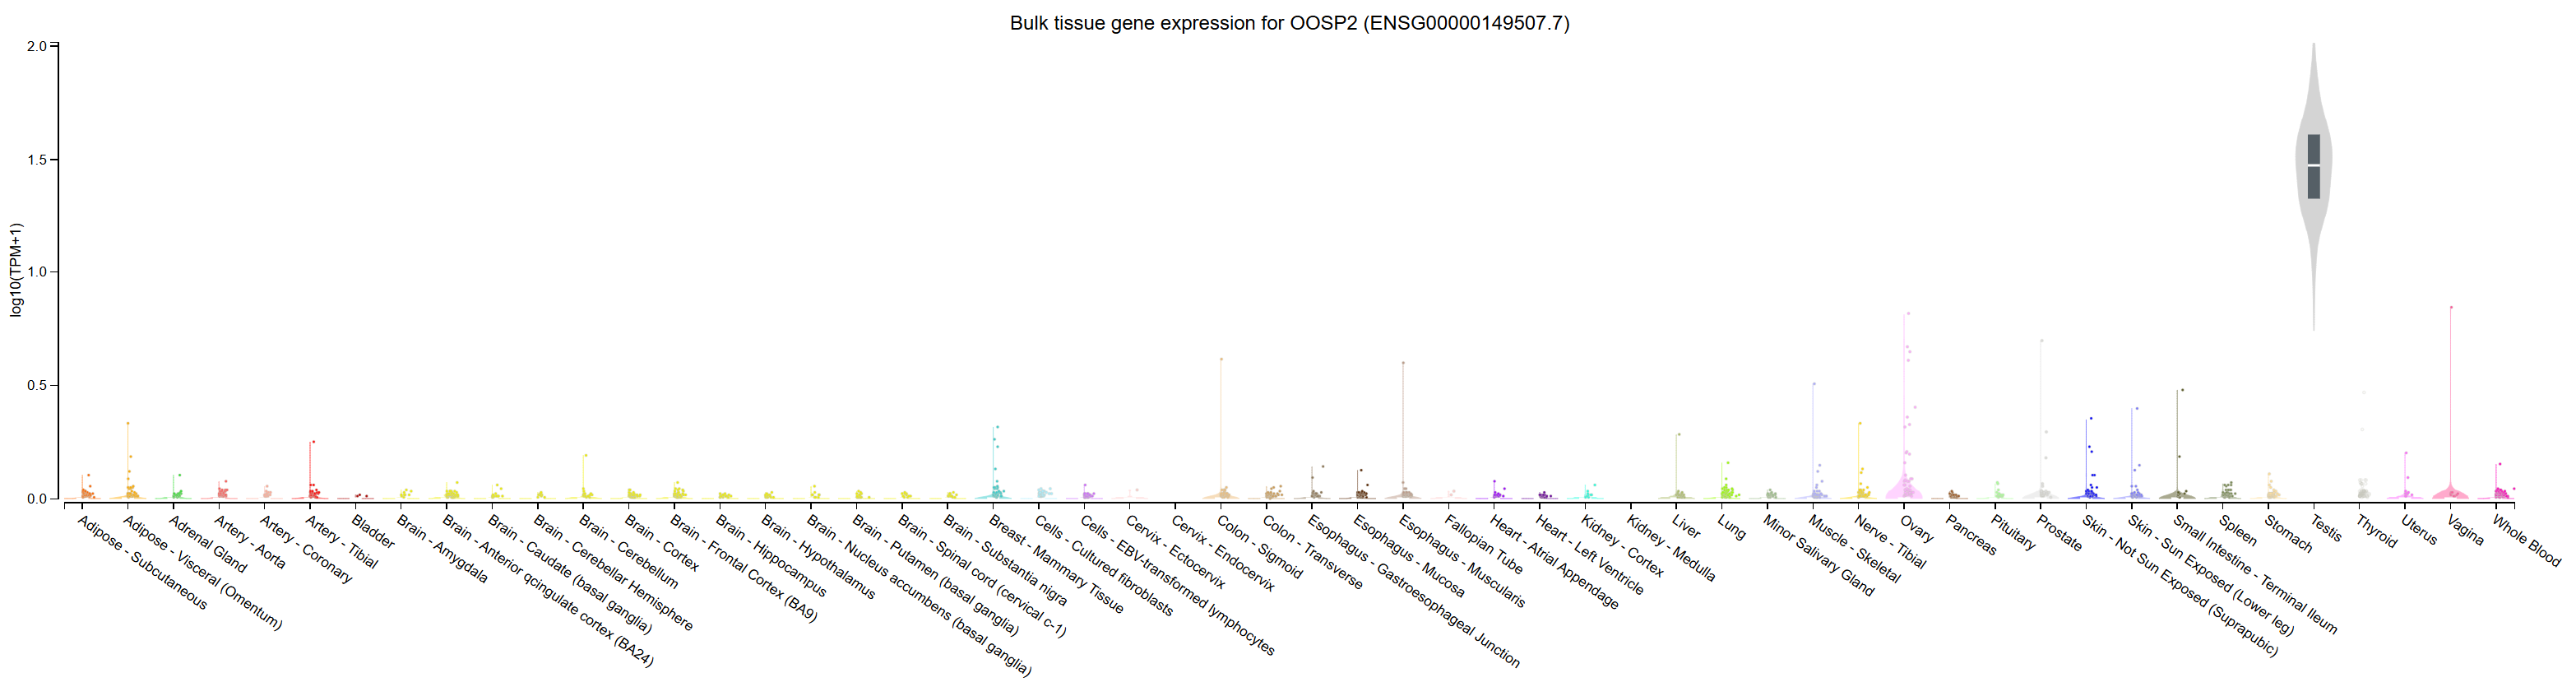

MTCO1P40 has the highest correlation among tissues.


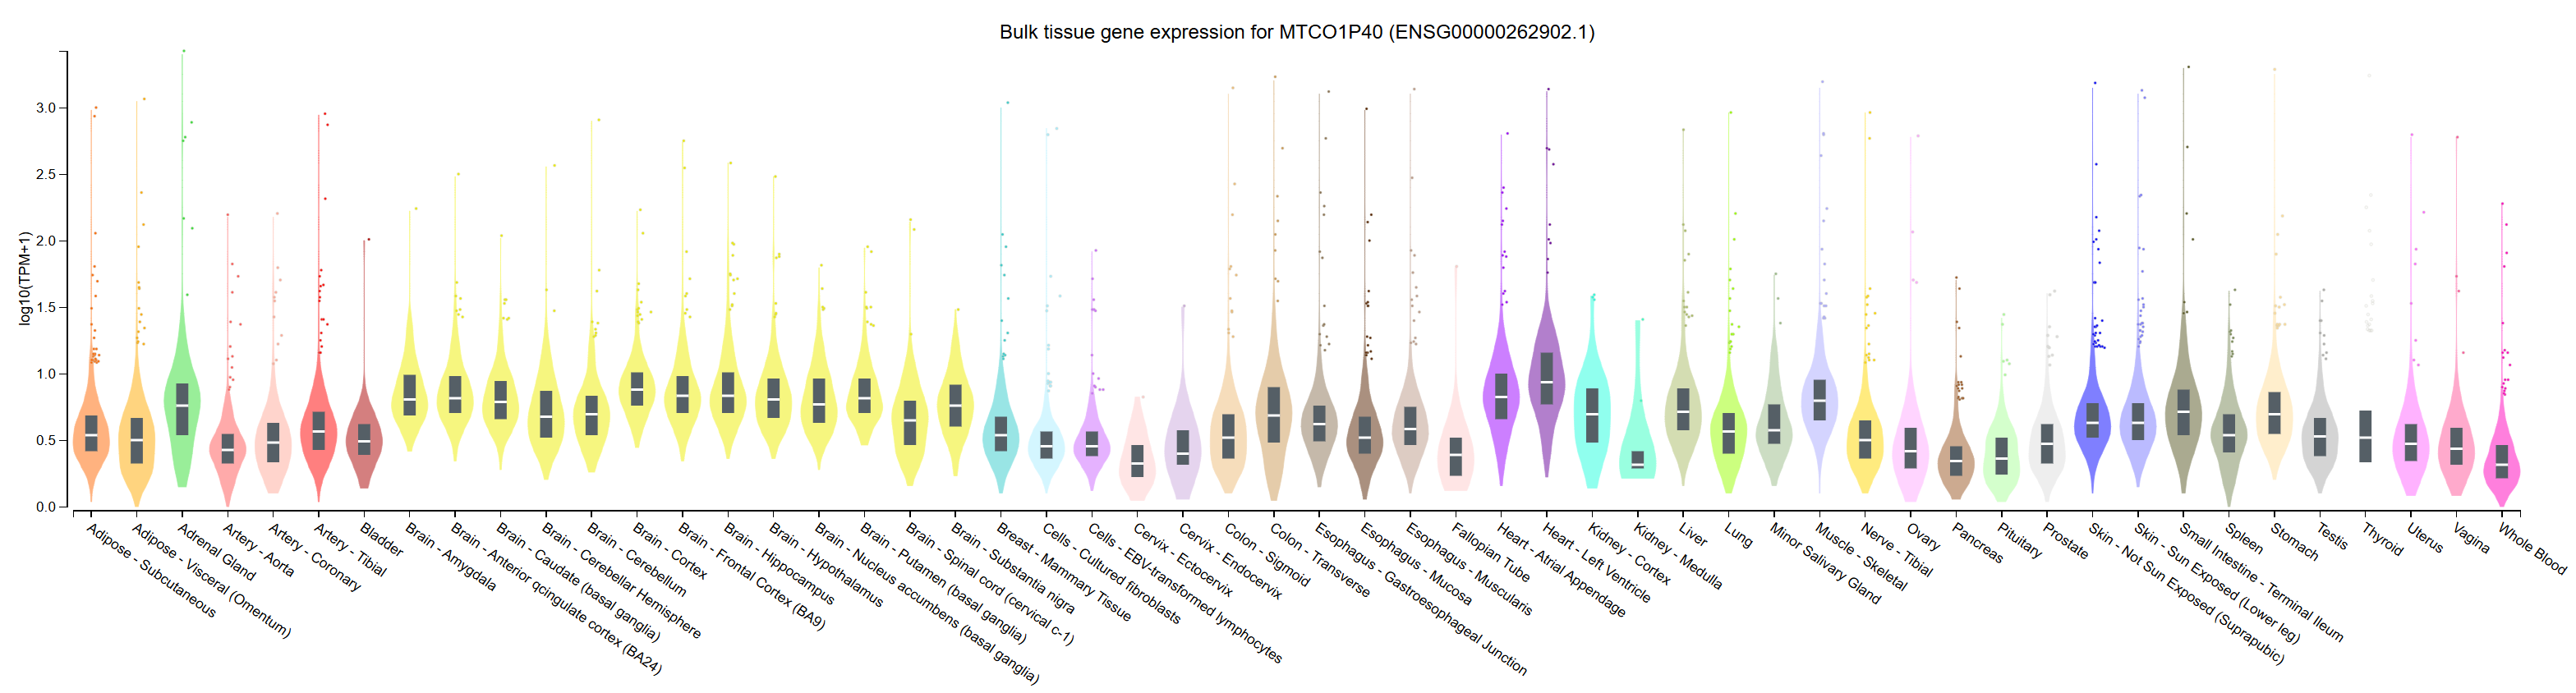

In [118]:
for key in tissue_donor:
    print(f"{key} : {len(tissue_donor[key])}")

liver : 262
uterus : 153
skin_sun_exposed_lower_leg : 754
nerve_tibial : 670
breast_mammary_tissue : 514
artery_tibial : 691
testis : 414
vagina : 170
prostate : 282
pancreas : 362
esophagus_mucosa : 614
stomach : 407
small_intestine_terminal_ileum : 207
lung : 604
thyroid : 684
heart_left_ventricle : 452
adrenal_gland : 295
ovary : 193
whole_blood : 803
pituitary : 313
colon_transverse : 479
brain_cerebellum : 266
kidney_cortex : 104
muscle_skeletal : 818
spleen : 277
minor_salivary_gland : 181
adipose_subcutaneous : 714
